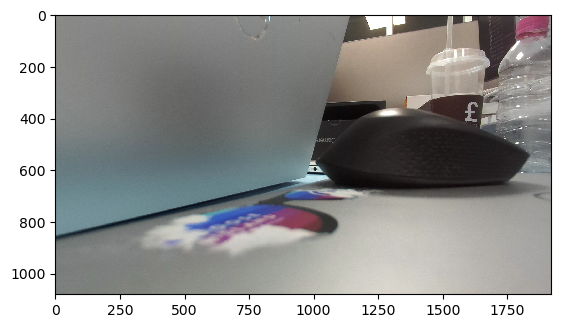

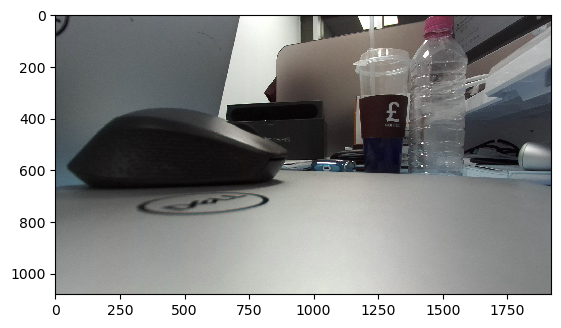

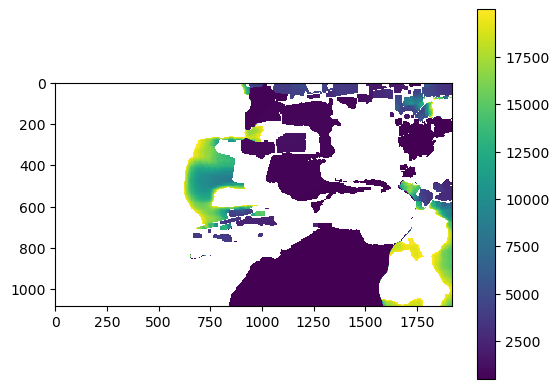

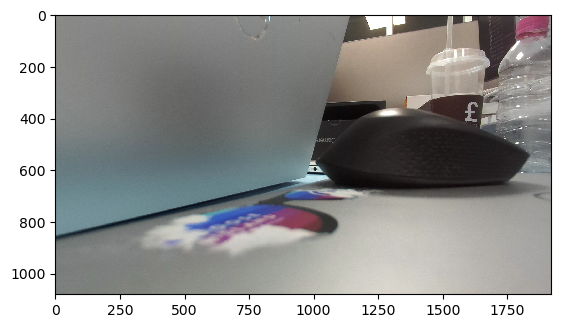

In [64]:
import pyzed.sl as sl
import cv2
import matplotlib.pyplot as plt

# Create a ZED camera object
zed = sl.Camera()

# Set configuration parameters
init_params = sl.InitParameters()
init_params.camera_resolution = sl.RESOLUTION.HD1080
init_params.camera_fps = 30

# Open the camera
err = zed.open(init_params)
if err != sl.ERROR_CODE.SUCCESS:
    print("Error opening ZED camera: ", sl.ERROR_CODE.to_string(err))
    exit()

# Capture images
image_l = sl.Mat()
image_r = sl.Mat()
depth_map = sl.Mat()
image_normal = sl.Mat()
xyz_img = sl.Mat()

runtime_parameters = sl.RuntimeParameters()

# Grab a new frame
if zed.grab(runtime_parameters) == sl.ERROR_CODE.SUCCESS:
    # Retrieve the left and right images
    zed.retrieve_image(image_l, sl.VIEW.LEFT)
    zed.retrieve_image(image_r, sl.VIEW.RIGHT)
    zed.retrieve_measure(depth_map, sl.MEASURE.DEPTH)
    zed.retrieve_image(image_normal, sl.VIEW.NORMALS)
    # zed.retrieve_measure(xyz_img, sl.MEASURE.XYZRGBA)
    zed.retrieve_measure(xyz_img, sl.MEASURE.XYZ_RIGHT)

    # Convert the images to OpenCV format
    image_l_ocv = image_l.get_data()
    depth_map_ocv = depth_map.get_data()
    image_r_ocv = image_r.get_data()
    image_normal = image_normal.get_data()
    xyz_data = xyz_img.get_data()

    # Display the left and right images
    plt.imshow(image_l_ocv)
    plt.show()

    plt.imshow(image_r_ocv)
    plt.show()

    plt.imshow(depth_map_ocv)
    plt.colorbar()
    plt.show()

    plt.imshow(image_normal)
    plt.show()

# Close the camera and windows
zed.close()


In [65]:
xyz_img

n/a Ts 0 sl::Mat of size [0,0], with 1 channels of type float allocated on CPU (memory owned).

In [62]:
print(dir(sl.MEASURE))

['CONFIDENCE', 'DEPTH', 'DEPTH_RIGHT', 'DEPTH_U16_MM', 'DEPTH_U16_MM_RIGHT', 'DISPARITY', 'DISPARITY_RIGHT', 'LAST', 'NORMALS', 'NORMALS_RIGHT', 'XYZ', 'XYZABGR', 'XYZABGR_RIGHT', 'XYZARGB', 'XYZARGB_RIGHT', 'XYZBGRA', 'XYZBGRA_RIGHT', 'XYZRGBA', 'XYZRGBA_RIGHT', 'XYZ_RIGHT', '__class__', '__doc__', '__members__', '__module__']


In [47]:
import open3d as o3d

pcd = o3d.geometry.PointCloud()
xyz_data_wo_alpha = xyz_data[:,:,3]
xyz_data_o3d = xyz_data_wo_alpha.reshape(-1, 3)
pcd.points = o3d.utility.Vector3dVector(xyz_data_o3d)

/tmp/ipykernel_16814/2947906453.py:6: RuntimeWarning: invalid value encountered in cast
  pcd.points = o3d.utility.Vector3dVector(xyz_data_o3d)


WARNING - 2023-04-12 20:30:17,006 - image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/usr/lib/python3/dist-packages/matplotlib/cm.py:274: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


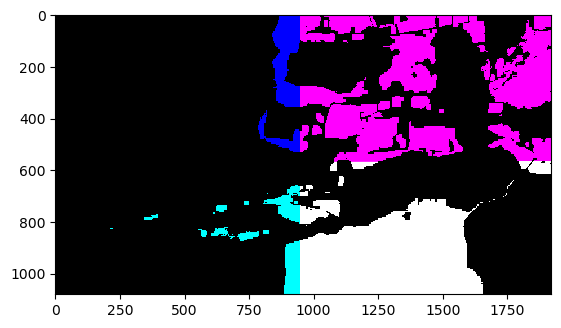

In [50]:
plt.imshow(xyz_data[:,:,:3])

In [55]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pcl_data[:,:,:3])

RuntimeError: Unable to cast Python instance to C++ type (compile in debug mode for details)

In [55]:
import pyzed.sl as sl
import open3d as o3d

# Create a ZED camera object
zed = sl.Camera()

# Set configuration parameters
init_params = sl.InitParameters()
init_params.camera_resolution = sl.RESOLUTION.HD720
init_params.camera_fps = 30
init_params.depth_mode = sl.DEPTH_MODE.PERFORMANCE  # Select the depth mode
init_params.coordinate_units = sl.UNIT.METER  # Set the coordinate system units to meters

# Open the camera
err = zed.open(init_params)
if err != sl.ERROR_CODE.SUCCESS:
    print("Error opening ZED camera: ", sl.ERROR_CODE.to_string(err))
    exit()

# Capture images and point cloud
image = sl.Mat()
depth_map = sl.Mat()
point_cloud = sl.Mat()
runtime_parameters = sl.RuntimeParameters()

# Grab a new frame
if zed.grab(runtime_parameters) == sl.ERROR_CODE.SUCCESS:
    # Retrieve the RGB image, depth map, and point cloud
    zed.retrieve_image(image, sl.VIEW.LEFT)
    zed.retrieve_measure(depth_map, sl.MEASURE.DEPTH)
    zed.retrieve_measure(point_cloud, sl.MEASURE.XYZRGBA)

    # Convert the point cloud to a NumPy array
    point_cloud_np = point_cloud.get_data()

# Disable positional tracking and close the camera
zed.close()


In [32]:
import open3d
import numpy as np

pcd = open3d.geometry.PointCloud()
np_points = np.random.rand(100, 3)

# From numpy to Open3D
pcd.points = open3d.utility.Vector3dVector(np_points)

# From Open3D to numpy
np_points = np.asarray(pcd.points)

In [60]:
import pyvista as pv

plotter = pv.Plotter()
plotter.add_points(xyz_data[:,:,:3], render_points_as_spheres=True, rgb=True)
plotter.show()

ValueError: RGB array must be n_points/n_cells by 3/4 in shape.